## Importing necessary librarys

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from collections import Counter
import matplotlib.pyplot as plt#data visualization
import seaborn as sns#data visualization
from wordcloud import WordCloud, STOPWORDS#wordcloud
import warnings
warnings.filterwarnings('ignore')
import csv
from sys import argv
import os.path
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

## loading the file

In [2]:
#Here we merged both the data set reviews and courses
reviews_coursera = pd.read_csv('data2/Coursera_reviews.csv')
courses_coursera = pd.read_csv('data2/Coursera_courses.csv')
merged = pd.merge(reviews_coursera,courses_coursera,on = 'course_id')

In [3]:
courses_coursera.columns

Index(['name', 'institution', 'course_url', 'course_id'], dtype='object')

In [4]:
reviews_coursera.columns

Index(['reviews', 'reviewers', 'date_reviews', 'rating', 'course_id'], dtype='object')

In [5]:
print(merged.shape)

(1454711, 8)


In [6]:
print(merged.columns)

Index(['reviews', 'reviewers', 'date_reviews', 'rating', 'course_id', 'name',
       'institution', 'course_url'],
      dtype='object')


In [7]:
print(merged.head(3))

                                             reviews       reviewers  \
0  Pretty dry, but I was able to pass with just t...     By Robert S   
1  would be a better experience if the video and ...  By Gabriel E R   
2  Information was perfect! The program itself wa...      By Jacob D   

   date_reviews  rating                 course_id  \
0  Feb 12, 2020       4  google-cbrs-cpi-training   
1  Sep 28, 2020       4  google-cbrs-cpi-training   
2  Apr 08, 2020       4  google-cbrs-cpi-training   

                                                name  \
0  Become a CBRS Certified Professional Installer...   
1  Become a CBRS Certified Professional Installer...   
2  Become a CBRS Certified Professional Installer...   

                 institution  \
0  Google - Spectrum Sharing   
1  Google - Spectrum Sharing   
2  Google - Spectrum Sharing   

                                          course_url  
0  https://www.coursera.org/learn/google-cbrs-cpi...  
1  https://www.coursera.org/learn/

Programming for Everybody (Getting Started with Python)    45218
Machine Learning                                           35895
Neural Networks and Deep Learning                          35750
Technical Support Fundamentals                             35319
Python Data Structures                                     33546
Name: name, dtype: int64
Index(['Programming for Everybody (Getting Started with Python)',
       'Machine Learning', 'Neural Networks and Deep Learning',
       'Technical Support Fundamentals', 'Python Data Structures',
       'Learning How to Learn: Powerful mental tools to help you master tough subjects',
       'AI For Everyone', 'Excel Skills for Business: Essentials',
       'What is Data Science?', 'The Science of Well-Being',
       ...
       'COVID-19 Contact Tracing For Nursing Professionals',
       'The Business of Product Management I',
       'Spanish for Successful Communication in Healthcare Settings',
       'Entreprise et changement climatique',
 

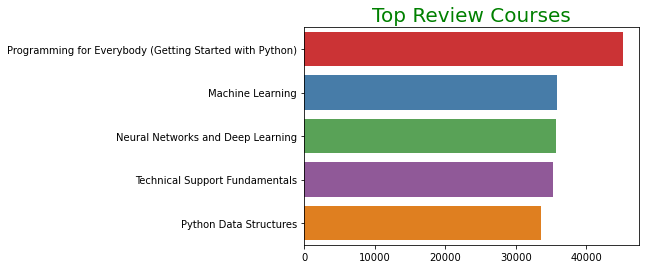

In [8]:
#Coursera Course with highest number of reviews

courses_top_review= merged.name.value_counts()

print(courses_top_review.head(5))

print(courses_top_review.index)

#Top most review courses of Coursera
#The bar plot represents an estimate of central tendency for a numeric 
#variable with each rectangle and provides some indication

plt.title('Top Review Courses', fontsize = 20,color='green')
sns.barplot(x = courses_top_review.head(5).values ,palette="Set1",y =courses_top_review.head(5).index)
plt.show()




Programming for Everybody (Getting Started with Python)    45218
Machine Learning                                           35895
Neural Networks and Deep Learning                          35750
Technical Support Fundamentals                             35319
Python Data Structures                                     33546
Name: name, dtype: int64
Index(['Programming for Everybody (Getting Started with Python)',
       'Machine Learning', 'Neural Networks and Deep Learning',
       'Technical Support Fundamentals', 'Python Data Structures',
       'Learning How to Learn: Powerful mental tools to help you master tough subjects',
       'AI For Everyone', 'Excel Skills for Business: Essentials',
       'What is Data Science?', 'The Science of Well-Being',
       ...
       'COVID-19 Contact Tracing For Nursing Professionals',
       'The Business of Product Management I',
       'Spanish for Successful Communication in Healthcare Settings',
       'Entreprise et changement climatique',
 

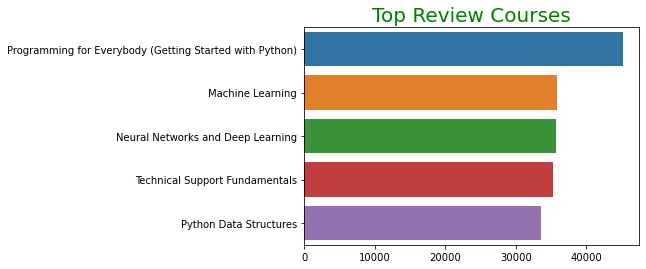

In [9]:
#Coursera Course with highest number of reviews

courses_top_review= merged.name.value_counts()

print(courses_top_review.head(5))

print(courses_top_review.index)

#Top most review courses of Coursera
#The bar plot represents an estimate of central tendency for a numeric 
#variable with each rectangle and provides some indication

plt.title('Top Review Courses', fontsize = 20,color='green')
sns.barplot(x = courses_top_review.head(5).values ,y =courses_top_review.head(5).index)
plt.show()


In [10]:
# Loading the data
coursera_review_course = pd.read_csv('data2/reviews_by_course.csv')
coursera_review = pd.read_csv('data2/reviews.csv')
#mcresponse = pd.read_csv('data2/multipleChoiceResponses.csv')

In [11]:
#Columns in Review Dataset
coursera_review_course.columns 

Index(['CourseId', 'Review', 'Label'], dtype='object')

In [12]:
# Most popular courses as per review
reviews_number = coursera_review_course["CourseId"].value_counts()
# show top courses by the reviews 
print(reviews_number[:5])

machine-learning         8570
learning-how-to-learn    7090
python                   5906
python-data              2372
python-network-data      1844
Name: CourseId, dtype: int64


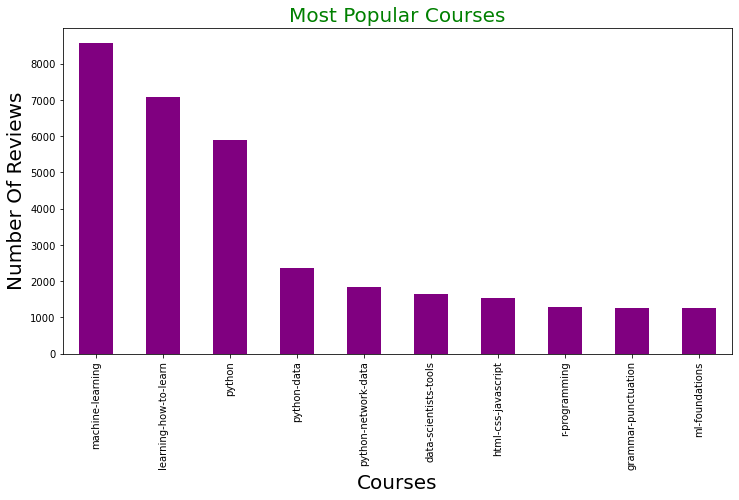

In [13]:
#  The most Popular courses

plt.rcParams['figure.figsize'] = (12,6)
coursera_review_course['CourseId'].value_counts().head(10).plot.bar(color = 'purple')
plt.title('Most Popular Courses', fontsize = 20 ,color="green")
plt.xlabel('Courses', fontsize =20)
plt.ylabel("Number Of Reviews", fontsize=20)
plt.show()

In [14]:
####Coursera Reviews Dataset which has total of  1835 Courses
# unique course ID
len(coursera_review_course["CourseId"].unique())

1835

In [15]:
# The review by course

print(coursera_review_course.describe())

print(coursera_review.describe())

               Label
count  140320.000000
mean        4.619185
std         0.821347
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
                  Id          Label
count  107018.000000  107018.000000
mean    53508.500000       4.581145
std     30893.579891       0.860956
min         0.000000       1.000000
25%     26754.250000       4.000000
50%     53508.500000       5.000000
75%     80262.750000       5.000000
max    107017.000000       5.000000


University of Michigan                167069
DeepLearning.AI                       117029
Google                                 78613
IBM                                    70769
University of Pennsylvania             70531
Stanford University                    63504
University of California San Diego     59589
Johns Hopkins University               57149
Yale University                        51850
Google Cloud                           49285
Name: institution, dtype: int64


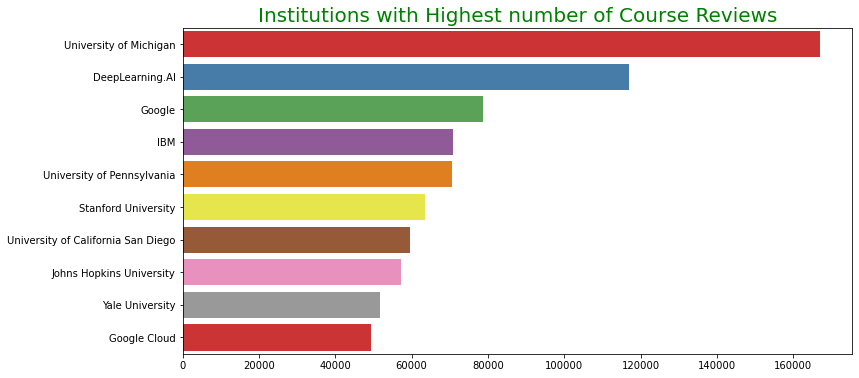

In [16]:
#Institutions with Highest number of course Reviews
highest_reviewed_institution = merged.institution.value_counts()
print(highest_reviewed_institution.head(10))

plt.title('Institutions with Highest number of Course Reviews', color='green',fontsize = 20)
sns.barplot(x = highest_reviewed_institution.head(10).values ,palette="Set1",y =highest_reviewed_institution.head(10).index)
plt.show()
print("")



University of Michigan                167069
DeepLearning.AI                       117029
Google                                 78613
IBM                                    70769
University of Pennsylvania             70531
Stanford University                    63504
University of California San Diego     59589
Johns Hopkins University               57149
Yale University                        51850
Google Cloud                           49285
Name: institution, dtype: int64


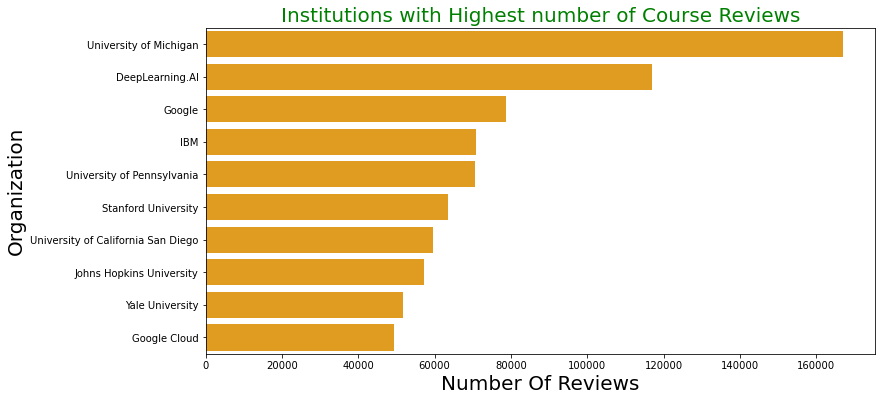

In [17]:
#Institutions with Highest number of course Reviews
highest_reviewed_institution = merged.institution.value_counts()
print(highest_reviewed_institution.head(10))

plt.title('Institutions with Highest number of Course Reviews', color='green',fontsize = 20)
plt.xlabel("Number Of Reviews", fontsize=20)
plt.ylabel("Organization", fontsize=20)
sns.barplot(x = highest_reviewed_institution.head(10).values ,color="orange",y =highest_reviewed_institution.head(10).index)
plt.show()
print("")


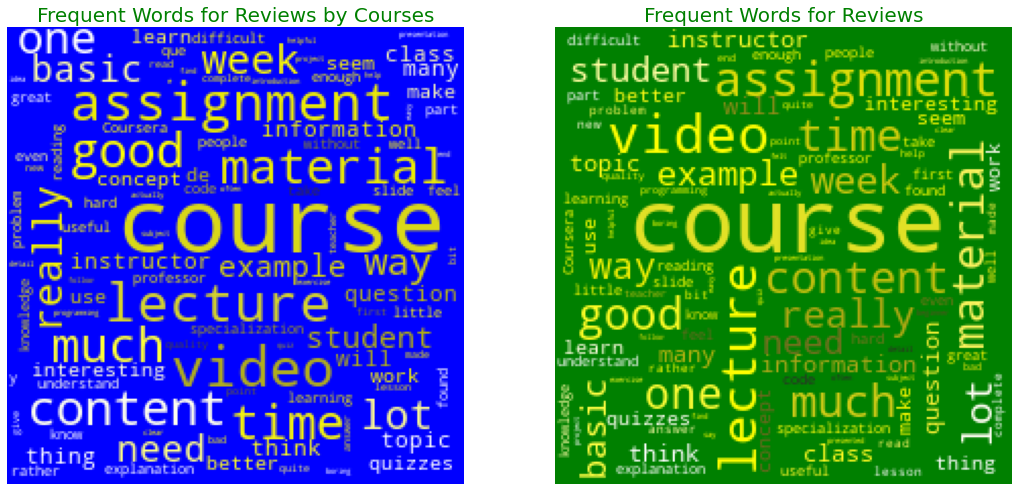

In [18]:
### Wordcloud for Most Frequent Words for Reviews by Courses

from wordcloud import WordCloud
#A word cloud ( tag cloud) is a visualrepresentation of words. Cloud creators are used to highlight
#popular words and phrases based on frequency and relevance.They provide  with quick and simple visual insights that can
#lead to more in-depth analyses.

from wordcloud import ImageColorGenerator
#Color generator based on a color image.
#Generates colors based on an RGB image

from PIL import Image #Python Imaging Library 


plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)

image_1 = ' '.join([text for text in coursera_review_course['Review'][coursera_review_course['Label'] == 2]])

mask = np.array(Image.open('suman.jpg'))

#ImageDataGenerator provides a way for image data augmentation:  
#consider the image segmentation task where Y is not a categorical 
#label but a image mask which is the same size as input X,
wordcloud = WordCloud(background_color = 'blue', max_words = 100, mask = mask).generate(image_1)
image_colors = ImageColorGenerator(mask)## create coloring from image

plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')

plt.title('Frequent Words for Reviews by Courses', fontsize = 20,color='green')



plt.subplot(1, 2, 2)

image_2 = ' '.join([text for text in coursera_review['Review'][coursera_review['Label'] == 2]])
mask = np.array(Image.open('suman.jpg'))

wordcloud = WordCloud(background_color = 'green', max_words = 100, mask = mask).generate(image_2)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Frequent Words for Reviews', fontsize = 20,color='green')
plt.show()

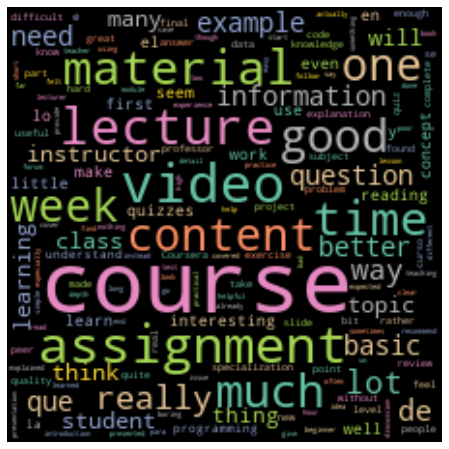

In [19]:
# Generate a word cloud image-
stopwords = set(STOPWORDS)
mask = np.array(Image.open("suman-2.jpg"))
wordcloud = WordCloud(width = 300, height = 200, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS,
                      mask=mask).generate(' '.join([text for text in coursera_review_course['Review'][coursera_review_course['Label'] == 2]]))

# create coloring from image
#Frequent Words for Reviews by Courses
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("suman3.png", format="png") 
plt.show()


plt.show()

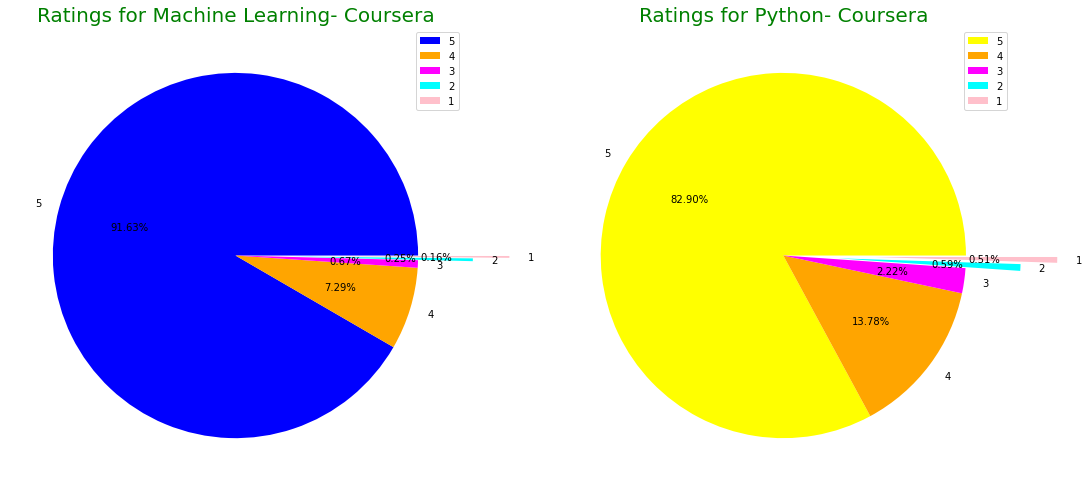

In [20]:
#Ratings of Machine learning and Python course as per review

machine_learning = coursera_review_course['Label'][coursera_review_course['CourseId'] == 'machine-learning']
plt.subplot(1, 2, 1)
machine_learning.value_counts().plot.pie(colors = ['blue', 'orange', 'magenta', 'cyan', 'pink'],
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = False)

plt.axis('off')
plt.title('Ratings for Machine Learning- Coursera', color='green',fontsize = 20)
plt.legend()

python_rating = coursera_review_course['Label'][coursera_review_course['CourseId'] == 'python']

plt.subplot(1, 2, 2)
python_rating.value_counts().plot.pie(colors = ['yellow', 'orange', 'magenta', 'cyan', 'pink'],
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = False)

plt.axis('off')
plt.title('Ratings for Python- Coursera',color='green' ,fontsize = 20)
plt.legend()
plt.show()

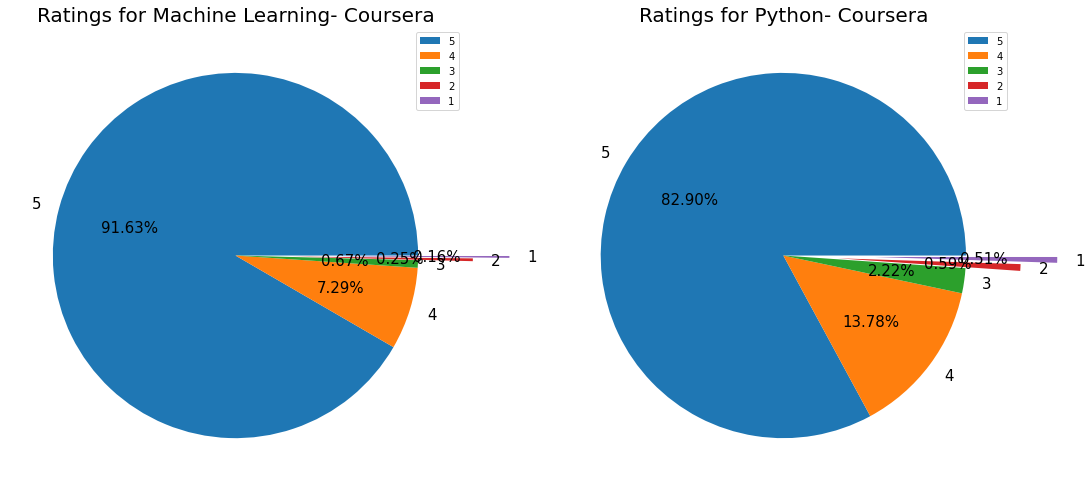

In [21]:
#Ratings of Machine learning and Python course as per review

machine_learning = coursera_review_course['Label'][coursera_review_course['CourseId'] == 'machine-learning']
plt.subplot(1, 2, 1)
machine_learning.value_counts().plot.pie(
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = False, textprops={"fontsize":15})

plt.axis('off')
plt.title('Ratings for Machine Learning- Coursera',fontsize = 20)
plt.legend()

python_rating = coursera_review_course['Label'][coursera_review_course['CourseId'] == 'python']

plt.subplot(1, 2, 2)
python_rating.value_counts().plot.pie(
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = False, textprops={"fontsize":15})

plt.axis('off')
plt.title('Ratings for Python- Coursera' ,fontsize = 20)
plt.legend()
plt.show()

In [22]:
## Here we Filter Reviews For course Machine Learning 
##Most of the review comment is very good,excellent and rating is 5
machine_learning_review =  coursera_review_course.loc[ coursera_review_course['CourseId'] == 'machine-learning']
machine_learning_review.head(10)

,CourseId,Review,Label
73134,machine-learning,A great course given with passion and clarity....,5
73135,machine-learning,私はソフトエンジニアですが、これまで機械学習という課題に取り組んだことがありませんでした。こ...,5
73136,machine-learning,excellent,5
73137,machine-learning,Very good course! The vectorisation can be a b...,5
73138,machine-learning,"Great course, great teacher, great level of de...",5
73139,machine-learning,It was a great course .I learned most importan...,5
73140,machine-learning,I love this course. But you have to be comfort...,5
73141,machine-learning,如沐春风,5
73142,machine-learning,I think this Machine Learning course quiet cha...,4
73143,machine-learning,Excellent course! Thank you professor Ng expla...,5


In [23]:
####Courses with maximum number of reviews  is Machine Learning and Python
## No of reviews for machine learning course
#Machine Learning Course has the highest number of reviews 8570. 
machine_learning_review.shape

(8570, 3)

In [24]:
##### Here We Ignore Reviews with Non- English Alpha Numeric Characters
# We have 8220 reviews.
## Filter only Reviews With English alphanumeric chars
machine_learning_review = machine_learning_review[machine_learning_review['Review'].str.contains('[A-Za-z0-9 ]', na=False)]
machine_learning_review.head(10)
machine_learning_review.shape

(8220, 3)

<AxesSubplot:title={'center':'Rating Distribution'}, ylabel='Frequency'>

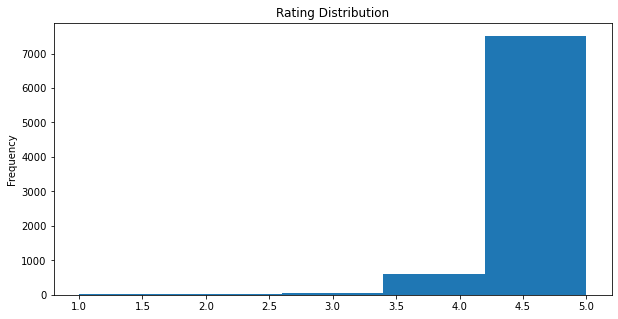

In [25]:
## Ratings Distribution for Reviews
machine_learning_review['Label'].plot(
    kind='hist',
    bins=5,
    x='Label',
    y='count',
    title='Rating Distribution',
    figsize=(10, 5))

In [ ]:
#### Now we add Sentiment Score For Review using TextBlob
##TextBlob will give the sentiment score for each review ranging from 
#-1 (being negative sentiment) 
#to 1 (positive sentiment)
#and 0 being neutral sentiment.
# Adding Sentiment Score For Review Using textblob 
#TextBlob is a python library for Natural Language Processing 
from textblob import TextBlob
machine_learning_review['sentiment_score'] = machine_learning_review['Review'].map(lambda text:TextBlob(text).sentiment.polarity)
machine_learning_review['review_len'] = machine_learning_review['Review'].astype(str).apply(len)
machine_learning_review.head()


In [ ]:
####Sample Reviews With Positive Sentiment Score.
# Most of the reviews says this course is awesome 
#Talking positively about Andrew Ng (who is the instructor for machine learning).
## Sample Reviews With Positive Sentiment Score
machine_learning_review.loc[machine_learning_review.sentiment_score == 1, ['Review']].sample(10)

In [ ]:
####Sample Reviews With Negative Sentiment Score.
### As per user the difficulty level of the course is high 
###Certificate is expensive
###Complex Concepts, Subject
#Audio Quality,Video Quality
#Course is little bit difficult
#Pay inorder to get certification for course
#Complex Computations applied
#Need linear algebra background.



machine_learning_review.nsmallest(10, 'sentiment_score')

In [ ]:
#####
# Average rating of the course
sns.set_color_codes()
average_rating = coursera_review_course.groupby("CourseId").mean().sort_values("Label", ascending=False)
# plot histogram
sns.distplot(average_rating, kde=False).set(xlabel="average rating", ylabel="number of courses")

In [ ]:
sns.distplot(average_rating, rug=False, rug_kws={"color": "r"}, hist=True)

In [ ]:
## Sentiment Scores Distribution for Reviews
#histogram is a graph showing frequency distributions.
#It is a graph showing the number of observations within each given interval.
#bins: If bins is set with an integer, it will define the number of equal-width bins within a range.
#If bins is set with a sequence, it will define the bin edges,
#including the left edge of the first bin and the right edge of the last bin

machine_learning_review['sentiment_score'].plot(
    kind='hist',
    bins=50,
    x='sentiment_score',
    y='count',
    color='green',
    title='Sentiment Score ',
    figsize=(12, 8))

In [ ]:
## Filtering Positive and negative reviews

#Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral. 
#we will be trying to do sentiment analysis on Twitter dataset and categorizing them 
#into positive, negative and neutral 
#behaviour of people
negative = machine_learning_review[machine_learning_review['sentiment_score'] < 0]
positive= machine_learning_review[machine_learning_review['sentiment_score'] > 0]
neutral= machine_learning_review[machine_learning_review['sentiment_score'] == 0]
print(negative.head())
print(positive.head())
print(neutral)

In [ ]:
machine_learning_review

In [ ]:
## Use CounVectorizer to analyze top n grams of the reviews
##Convert a collection of text documents to a matrix of token counts.
##An n-gram is a collection of n successive items in a text document that may include words,
##numbers, symbols, and punctuation. N-gram models are useful in many text analytics applications


sns.color_palette("rocket")
def ngrams(corpus, k=1, n=None):
    vec = CountVectorizer(ngram_range=(k, k),stop_words = 'english')
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def graph(common_words):
    df1 = pd.DataFrame(common_words, columns = ['Review' , 'count'])
    df2 = df1.groupby('Review').sum()['count'].sort_values(ascending=True).plot(
        kind='barh', color='firebrick',y='Count', x='Word', figsize=(20, 10))
def graph2(common_words2):
    df1 = pd.DataFrame(common_words2, columns = ['Review' , 'count'])
    df2 = df1.groupby('Review').sum()['count'].sort_values(ascending=True).plot(
        kind='barh', color='green',y='Count', x='Word', figsize=(20, 10))
    
def graph3(common_words3):
    df1 = pd.DataFrame(common_words3, columns = ['Review' , 'count'])
    df2 = df1.groupby('Review').sum()['count'].sort_values(ascending=True).plot(
        kind='barh', color='blue',y='Count', x='Word', figsize=(20, 10))
    
def graph4(common_words4):
    df1 = pd.DataFrame(common_words4, columns = ['Review' , 'count'])
    df2 = df1.groupby('Review').sum()['count'].sort_values(ascending=True).plot(
        kind='barh', color='blue',y='Count', x='Word', figsize=(20, 10))    
    
def graph5(common_words5):
    df1 = pd.DataFrame(common_words5, columns = ['Review' , 'count'])
    df2 = df1.groupby('Review').sum()['count'].sort_values(ascending=True).plot(
        kind='barh', color='blue',y='Count', x='Word', figsize=(20, 10))    
    
def graph6(common_words6):
    df1 = pd.DataFrame(common_words6, columns = ['Review' , 'count'])
    df2 = df1.groupby('Review').sum()['count'].sort_values(ascending=True).plot(
        kind='barh', color='blue',y='Count', x='Word', figsize=(20, 10))

In [ ]:
## Analyzing Positive Reviews with one word

common_words = ngrams(positive['Review'], 1, 20)
graph(common_words)

In [ ]:
### ## Analyzing Positive Reviews with two word
common_words2 = ngrams(positive['Review'], 2, 20)
graph2(common_words2)

In [ ]:
### ## Analyzing Positive Reviews with three word
#People mentioned positive reviews more about following
#Easily Understandable ,Great,Good,Awesome courseCourse 
#Prof. Andrew Ng 
#Good Introduction machine learning Course  & machine learning techniques
common_words3 = ngrams(positive['Review'], 3, 20)
graph2(common_words3)

In [ ]:
## Analyzing Negative Reviews with one word

common_words4 = ngrams(negative['Review'], n=10)
graph4(common_words4)

In [ ]:
### ## Analyzing Negative Reviews with two word
common_words5 = ngrams(negative['Review'], 2, 20)
graph5(common_words5)

In [ ]:
### ## Analyzing Negative Reviews with three word
#People mentioned negative reviews more about following
#Complex Concepts,Subject
#Audio Quality,Video Quality issues
#Course is little bit difficult
#Pay inorder to get certification for course
#Complex Computations applied
#Need linear algebra background.
common_words6 = ngrams(negative['Review'], 3, 20)
graph(common_words6)

In [ ]:
#Review for Machine learning and Python by wordcloud

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

mlreview = ' '.join([text for text in coursera_review_course['Review'][coursera_review_course['CourseId'] == 'machine-learning']])

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = 'white',width = 1200, height = 1000, max_words = 70).generate(mlreview)
plt.rcParams['figure.figsize'] = (18, 7)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Machine Learning', fontsize = 20)

pyreview = ' '.join([text for text in coursera_review_course['Review'][coursera_review_course['CourseId'] == 'python']])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 1200, height = 1000, max_words = 70).generate(pyreview)
plt.rcParams['figure.figsize'] = (18, 7)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Python', fontsize = 20)

plt.show()

In [ ]:
# Different labels for Reviews in reviews by Courses

#Circular statistical graphic, which is divided into slices to illustrate numerical proportion.
#In a pie chart, the arc length of each slice (and consequently its central angle and area)
#is proportional to the quantity it represents.
plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
coursera_review_course['Label'].value_counts().plot.pie(colors = ['pink', 'orange', 'violet', 'purple', 'cyan'], labels = ["5", "4", "3", "1", "2"], autopct = '%.2f%%')
plt.axis('off')
plt.title('Labels of Reviews by Courses',color='green', fontsize = 15)

plt.subplot(1, 2, 2)
coursera_review['Label'].value_counts().plot.pie(colors = ['lightgreen', 'green', 'lightblue', 'purple', 'cyan'], labels = ["5", "4", "3", "1", "2"], autopct = '%.2f%%')
plt.axis('off')
plt.title('Labels of Reviews by Courses', color='green', fontsize = 15)

plt.show()


#circular statistical graphic, which is divided into slices to illustrate numerical proportion.
#In a pie chart, the arc length of each slice (and consequently its central angle and area)
#is proportional to the quantity it represents.


In [ ]:
# Total Number of courses with average rating 5.0
#Number of courses with average rating 5.0: is 239 13% of total courses
average_rating_5 = int(average_rating[average_rating.Label==5.0].count())
print("Number of courses with average rating 5.0:")
print(average_rating_5)
print("% of the total number of courses:")
print(average_rating_5/len(coursera_review_course["CourseId"].unique())*100)

In [ ]:
# extract review numbers for courses with average rating 5.0
df_av_rating_5 = pd.DataFrame(reviews_number)[average_rating.Label==5.0]
# explore statistics
print(df_av_rating_5.describe())

In [ ]:
#Compute the number of characters in the review
coursera_review_course["Review_len"] = coursera_review_course["Review"].str.len()
# compute the average number of characters in the review for every course
average_len = coursera_review_course.groupby("CourseId").mean().sort_values("Review_len", ascending=False)


# explore statistics
print(average_len.Review_len.describe())


#plot histogram
sns.distplot(average_len["Review_len"], kde=False).set(xlabel="Average number of characters in review", ylabel="Number of courses",)

In [ ]:
# Merge datasets on index and create new DataFrame "analysis"
# first we will transform most_reviews from Series to DataFrame
coursera_reviews_number = pd.DataFrame(reviews_number)

# merge df_reviews_number and average_rating
analysis = pd.merge(coursera_reviews_number, average_rating,  right_index=True, left_index=True)

# transform average_len from Series to DataFrame
df_average_len = pd.DataFrame(average_len.Review_len)

# merge analysis and df_average_len
analysis = pd.merge(analysis, df_average_len,  right_index=True, left_index=True)

# rename columns
analysis.columns = ["reviews_number", "av_rating", "av_review_len"]

# show first 5 rows
analysis.head()

In [ ]:
# Let's first explore correlations 
# A weak negative correlation between the average rating and average review length.
analysis.corr()

In [ ]:
#correlation looks on a scatter plot
# plot scatter plot with av_review_len as x and av_rating as y
sns.scatterplot(x="av_review_len", y="av_rating", data = analysis).set(xlim=(0,500), xlabel="average number of characters in review", ylabel="average rating")

In [ ]:
# linear modelcorroborates the negative correlation between the average rating and average review length.

# Show scatter plot with linear model
sns.lmplot(x="av_review_len", y="av_rating", data = analysis).set(xlim=(-30, 500), ylim=(2,5.1), xlabel="average number of characters in review", ylabel="average rating")


In [ ]:
from textblob import TextBlob
coursera_review['sentiment'] = coursera_review.Review.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
coursera_review['type'] = ['Good' if x >0.3 else 'Bad' if x < -0.3 else 'neutral' for x in  coursera_review ['sentiment']] 

In [ ]:
coursera_review.head(10)

In [ ]:
from textblob import TextBlob
coursera_review['sentiment'] = coursera_review.Review.apply(lambda x: TextBlob(str(x)).sentiment.polarity)
coursera_review['type'] = ['Good' if x >0.3 else 'Bad' if x < -0.3 else 'neutral' for x in  coursera_review ['sentiment']]
coursera_review.head(10)

In [ ]:
#Common pattern in course

In [ ]:
# Put all the course names as strings in a list
d=pd.read_csv('data/coursea_data.csv')


In [ ]:
d.columns

In [ ]:
# Put all the course names as strings in a list
myList = d['course_title'].tolist()

In [ ]:
myList

In [ ]:
#split every single title into individual words.
t = []

for i in myList:
    t.append((i).split())

In [ ]:
t

In [ ]:
#iterate through each split list and put each word in a new list
d = []
for i in t:
    for b in i:
        d.append(b)

In [ ]:
# Use the counter function from the collections module in python to find out most common used words
word_count = Counter(d)

print(word_count.most_common())

In [ ]:
from nltk.corpus import stopwords 

In [ ]:
# Use the ntlk module to remove known english words

clean_tokens = d[:]
 
sr = stopwords.words('english')
 
for token in d:
 
    if token in stopwords.words('english'):
 
        clean_tokens.remove(token)

In [ ]:
clean_tokens

In [ ]:
import nltk
freq = nltk.FreqDist(clean_tokens)

In [ ]:
#Get an insight into what types of words are most commonly used.
freq.plot(15, cumulative= False)

In [ ]:
#Visualize the most commonly use words
word_could_dict=Counter(clean_tokens)
wordcloud = WordCloud(width = 1000,background_color='black', colormap='Set2', height = 600).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()